# Matrix Operations

Matrices are a basic method of storing data in scientific computing. Numerous libraries already exist to do a variety of specialized matrix operations (see [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms)). Here, we will investigate a few operations on matrices.

## Matrix Multiplication

Beyond simply adding and subtracting matrices, [Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication#General_definition_of_the_matrix_product) is a fundemental operation. In Python, Numpy already offers a means of multiplying matrices using the [`dot`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html) operation.

**Problem:** As a simple sanity check, write a method that does matrix multiplication,

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def matrix_multiplication(A, B):
    """
    A and B will be two dimensional matrices of shape (N, M) and (M, P) respectively
    You can index into them by doing A[i][j] or A[i, j] (because they will be numpy matrices)
    
    Return the product A.dot(B), but write your own code!
    """
    return A.dot(B) # Replace this with you own code!

Test the code,

In [4]:
for i in range(10):
    (N, M, P) = np.random.randint(low=1, high=100, size=3)
    A, B = np.random.randn(N, M), np.random.randn(M, P)
    assert np.all(A.dot(B) == matrix_multiplication(A, B))

## Unitary matrices

[Unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix) have a special property that if you multiply a matrix by it's transpose, then you get the identity matrix.

$$\begin{align}
A^T A = \mathbb{1}
\end{align}$$

for example, the following matrices are unitary (called the [SO(2) group](https://en.wikipedia.org/wiki/Orthogonal_group)),

In [5]:
def so2(phi):
    return np.array([[np.cos(phi), -np.sin(phi)],
                     [np.sin(phi),  np.cos(phi)]])

In [6]:
A = so2(1.234)
print(A)
print(A.T.dot(A))

[[ 0.33046511 -0.94381821]
 [ 0.94381821  0.33046511]]
[[ 1.  0.]
 [ 0.  1.]]


**Problem:** Prove analytically, that $ A^T A = \mathbb{1} $ for all $ \phi $,

$$\begin{align}
A = \left(\begin{matrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{matrix}\right)
\end{align}$$

*Write proof here*

**Problem:** For a set of 2D points $ X $, we can graphically see what the SO(2) matrix does to the points. Play with $ phi $ till you can figure out what the matrix is doing.

In [9]:
X = np.random.randn(2, 3)

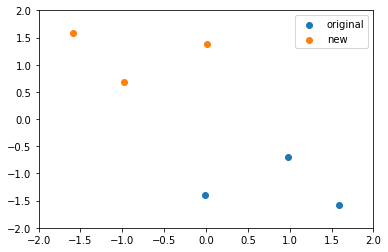

In [11]:
phi = np.pi
plt.scatter(X[0, :], X[1, :])
Y = so2(phi).dot(X)
plt.scatter(Y[0, :], Y[1, :])

plt.legend(['original', 'new'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

The norm of a vector $ x $ can be computed like $ \| x \|^2 = x^T x $.

**Problem:** For any unitary matrix $ U $ (meaning $ U^T U = \mathbb{1} $), show that $ \| U x \| = \| x \| $. *Hint, $ (Ax)^T = x^T A^T $*.

## Diagonalization of Matrices and Eigenvalues

Consider a problem where we want to multiply a matrix $ A $ times a vector $ x $. If we take $ A = P^T D P $ where $ P $ is unitary, then,

$$\begin{align}
y &= Ax \\
  &= P^T D P x \\
P y &= (P P^T) D P x 
\end{align}$$

note that by being unitary, $ P P^T = \mathbb{1} $ and if we label $ Py = y' $ and $ Px = x' $, then
$$\begin{align}
y' &= D x'
\end{align}$$

What we did is called [Change of Basis](https://en.wikipedia.org/wiki/Change_of_basis). For every matrix, there is a particular basis called the [eigenbasis](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenspaces,_geometric_multiplicity,_and_the_eigenbasis_for_matrices) which makes the new matrix $ D $ be [diagonal](https://en.wikipedia.org/wiki/Diagonal_matrix).

Changing basis to the eigenbasis is called diagonalizing the matrix. This is a very complex topic that I don't want to delve into super deep, but rather give a more hands on approach to. Interested readers can look at the [Wikipedia article](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) or just google for things about eigenvalues, eigenvectors, etc.

There is a numpy function that diagonalizes matrices for you already. As a demo, we will use the matrix [here](https://en.wikipedia.org/wiki/Diagonalizable_matrix#Characterisation)

In [41]:
A = np.array([[-1, 3, -1],
              [-3, 5, -1],
              [-3, 3, 1]])

In [42]:
D, P = np.linalg.eig(A)
D = np.diag(D)
print(D)
print(P)

[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]
[[-0.57735027 -0.10893917 -0.52206272]
 [-0.57735027  0.21459692 -0.68943695]
 [-0.57735027  0.97060827 -0.50212269]]


In [43]:
P.T.dot(P)

array([[ 1.        , -0.62138248,  0.98936034],
       [-0.62138248,  1.        , -0.57844241],
       [ 0.98936034, -0.57844241,  1.        ]])

In [46]:
P.dot(D).dot(np.linalg.inv(P))

array([[-1.,  3., -1.],
       [-3.,  5., -1.],
       [-3.,  3.,  1.]])